# Kaggle 신용카드 사기 검출
https://www.kaggle.com/mlg-ulb/creditcardfraud
## Credit Card Fraud Detection
* creditcard.csv (284,807 * 31)
* Class : <font color = 'blue'>'0' (정상결제)</font>, <font color = 'red'>'1' (부정결제)</font>
* 사기 검출(Fraud Detection), 이상 탐지(Anomaly Detection)

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. wget From Github
* 'creditCardFraud.zip' 파일 다운로드

In [2]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/creditCardFraud.zip

--2023-03-29 04:50:06--  https://raw.githubusercontent.com/rusita-ai/pyData/master/creditCardFraud.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69155672 (66M) [application/zip]
Saving to: ‘creditCardFraud.zip’

creditCardFraud.zip 100%[===================>]  65.95M   127MB/s    in 0.5s    

2023-03-29 04:50:07 (127 MB/s) - ‘creditCardFraud.zip’ saved [69155672/69155672]



* 다운로드 결과 확인

In [3]:
!ls -l 

total 67540
-rw-r--r-- 1 root root 69155672 Mar 29 04:50 creditCardFraud.zip
drwxr-xr-x 1 root root     4096 Mar 27 13:41 sample_data


# II. Data Preprocessing

> ## 1) Unzip 'creditCardFraud.zip'

* Colab 파일시스템에 'creditcard.csv' 파일 생성

In [4]:
!unzip /content/creditCardFraud.zip

Archive:  /content/creditCardFraud.zip
  inflating: creditcard.csv          


* creditcard.csv 파일 확인

In [5]:
!ls -l

total 214836
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
-rw-r--r-- 1 root root  69155672 Mar 29 04:50 creditCardFraud.zip
drwxr-xr-x 1 root root      4096 Mar 27 13:41 sample_data


> ## 2) 데이터 읽어오기

* pandas DataFrame

In [6]:
import pandas as pd

DF = pd.read_csv('creditcard.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* 0 (정상) Class와 1 (사기) Class 개수

In [8]:
DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

* 0 (정상) Class와 1 (사기) Class 비율

In [9]:
DF.Class.value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

> ## 3) 'Time' -> 'hours'

* 'Time': 각 거래와 첫 번째 거래 사이에 경과된 초('Seconds') 

> ### (1) 시간('hours') 정보 생성

In [10]:
timedelta = pd.to_timedelta(DF['Time'], unit = 's')

DF['Time'] = (timedelta.dt.components.hours).astype(int)

In [11]:
DF.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


> ## 4) train_test_split( )

* X (Input), y (Output) 지정

In [12]:
X = DF.iloc[:,:-1]
y = DF.iloc[:, -1]

X.shape, y.shape

((284807, 30), (284807,))

* With 'Stratify'

In [13]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045,
                                                    stratify = y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 30), (199364,), (85443, 30), (85443,))

* Train_Data와 Test_Data의 1 (부정) 비율이 균형

In [14]:
print('Train_Data :','\n', y_train.value_counts(normalize = True))
print()
print('Test_Data :','\n', y_test.value_counts(normalize = True))

Train_Data : 
 0    0.998275
1    0.001725
Name: Class, dtype: float64

Test_Data : 
 0    0.998268
1    0.001732
Name: Class, dtype: float64


# III. Keras Modeling

> ## 1) Import Tensorflow

* Tensorflow Version 확인

In [15]:
import tensorflow

tensorflow.__version__

'2.11.0'

> ## 2) Model Define

* 모델 신경망 구조 정의

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers

ccfd = models.Sequential()
ccfd.add(layers.Dense(128, activation = 'relu', input_shape = (30,)))
ccfd.add(layers.Dense(64, activation = 'relu'))
ccfd.add(layers.Dense(32, activation = 'relu'))
ccfd.add(layers.Dense(1, activation = 'sigmoid'))

* 모델 구조 확인

In [17]:
ccfd.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14,337
Trainable params: 14,337
Non-trainable params: 0
_________________________________________________________________


> ## 3) Model Compile

* 모델 학습방법 설정

In [18]:
ccfd.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['Recall'])

> ## 4) Model Fit

* 약 2분

In [ ]:
%%time

Hist_ccfd = ccfd.fit(X_train, y_train,
                     epochs = 50,
                     batch_size = 1024,
                     validation_data = (X_test, y_test))

Epoch 1/50
195/195 [==============================] - 4s 11ms/step - loss: 0.0682 - recall: 0.3140 - val_loss: 0.0241 - val_recall: 0.6014
Epoch 2/50
195/195 [==============================] - 2s 12ms/step - loss: 0.0168 - recall: 0.6744 - val_loss: 0.0050 - val_recall: 0.8378
Epoch 3/50
195/195 [==============================] - 2s 12ms/step - loss: 0.0059 - recall: 0.7616 - val_loss: 0.0032 - val_recall: 0.8243
Epoch 4/50
195/195 [==============================] - 2s 9ms/step - loss: 0.0066 - recall: 0.7355 - val_loss: 0.0037 - val_recall: 0.8243
Epoch 5/50
195/195 [==============================] - 2s 8ms/step - loss: 0.0103 - recall: 0.7267 - val_loss: 0.0033 - val_recall: 0.7838
Epoch 6/50
195/195 [==============================] - 2s 9ms/step - loss: 0.0037 - recall: 0.7674 - val_loss: 0.0033 - val_recall: 0.7905
Epoch 7/50
195/195 [==============================] - 2s 9ms/step - loss: 0.0232 - recall: 0.6802 - val_loss: 0.0116 - val_recall: 0.7432
Epoch 8/50
195/195 [===========

> ## 5) 학습 결과 시각화

* Loss Visualization

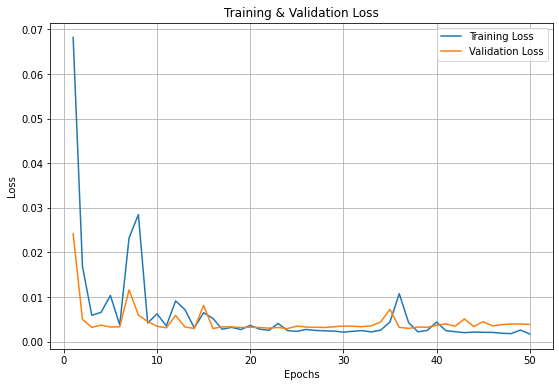

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_ccfd.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_ccfd.history['loss'])
plt.plot(epochs, Hist_ccfd.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

* Recall Visualization

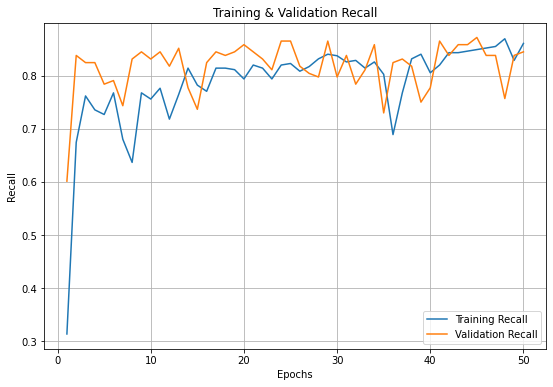

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_ccfd.history['recall']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_ccfd.history['recall'])
plt.plot(epochs, Hist_ccfd.history['val_recall'])
plt.title('Training & Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend(['Training Recall', 'Validation Recall'])
plt.grid()
plt.show()

> ## 6) Model Evaluate

* Loss & Accuracy

In [ ]:
loss, recall = ccfd.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Recall = {:.5f}'.format(recall))

Loss = 0.00386
Recall = 0.84459


> ## 7) Model Predict

* .predict( )

In [ ]:
import numpy as np

y_hat = np.round(ccfd.predict(X_test, verbose = 0))

y_hat

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

* Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  125,    23],
       [   14, 85281]])

* Scores

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99973   0.99984   0.99978     85295
          부정    0.89928   0.84459   0.87108       148

    accuracy                        0.99957     85443
   macro avg    0.94951   0.92222   0.93543     85443
weighted avg    0.99956   0.99957   0.99956     85443



# IV. MLP Modeling with SMORT


> ## 1) SMOTE

* Before SMOTE

In [ ]:
X_train.shape, y_train.shape

((199364, 30), (199364,))

In [ ]:
pd.Series(y_train).value_counts()

0    199020
1       344
Name: Class, dtype: int64

* imbalanced-learn Package

In [ ]:
from imblearn.over_sampling import SMOTE 

* After SMOTE

In [ ]:
OS = SMOTE(random_state = 2045)

X_train_OS, y_train_OS = OS.fit_resample(X_train, y_train)



In [ ]:
X_train_OS.shape, y_train_OS.shape

((398040, 30), (398040,))

* 0 (정상) Class와 1 (사기) Class 개수

In [ ]:
pd.Series(y_train_OS).value_counts()

0    199020
1    199020
Name: Class, dtype: int64

> ## 2) Model Define

* 모델 신경망 구조 정의

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

ccfd_OS = models.Sequential()
ccfd_OS.add(layers.Dense(256, activation = 'relu', input_shape = (30,)))
ccfd_OS.add(layers.Dense(128, activation = 'relu'))
ccfd_OS.add(layers.Dense(64, activation = 'relu'))
ccfd_OS.add(layers.Dense(32, activation = 'relu'))
ccfd_OS.add(layers.Dense(1, activation = 'sigmoid'))

* 모델 구조 확인

In [ ]:
ccfd_OS.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               7936      
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 51,201
Trainable params: 51,201
Non-trainable params: 0
_________________________________________________________________


> ## 3) Model Compile

* 모델 학습방법 설정

In [ ]:
ccfd_OS.compile(loss = 'binary_crossentropy',
                optimizer = 'rmsprop',
                metrics = ['Recall'])

> ## 4) Model Fit

* 약 2분

In [ ]:
%%time

Hist_ccfd = ccfd_OS.fit(X_train_OS, y_train_OS,
                        epochs = 15,
                        batch_size = 2048,
                        validation_data = (X_test, y_test))

Epoch 1/15
195/195 [==============================] - 7s 27ms/step - loss: 0.3612 - recall: 0.9015 - val_loss: 0.0535 - val_recall: 0.8851
Epoch 2/15
195/195 [==============================] - 4s 21ms/step - loss: 0.1298 - recall: 0.9529 - val_loss: 0.2262 - val_recall: 0.9257
Epoch 3/15
195/195 [==============================] - 6s 29ms/step - loss: 0.0814 - recall: 0.9679 - val_loss: 0.0427 - val_recall: 0.8919
Epoch 4/15
195/195 [==============================] - 4s 22ms/step - loss: 0.0583 - recall: 0.9767 - val_loss: 0.0405 - val_recall: 0.9122
Epoch 5/15
195/195 [==============================] - 4s 23ms/step - loss: 0.0475 - recall: 0.9809 - val_loss: 0.0415 - val_recall: 0.8919
Epoch 6/15
195/195 [==============================] - 6s 30ms/step - loss: 0.0401 - recall: 0.9847 - val_loss: 0.0276 - val_recall: 0.9122
Epoch 7/15
195/195 [==============================] - 4s 22ms/step - loss: 0.0332 - recall: 0.9885 - val_loss: 0.0307 - val_recall: 0.9122
Epoch 8/15
195/195 [=======

> ## 5) 학습 결과 시각화

* Loss Visualization

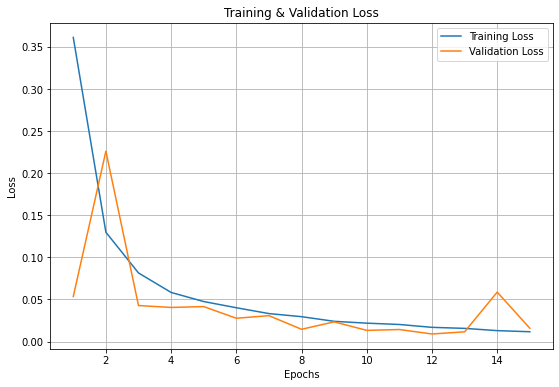

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_ccfd.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_ccfd.history['loss'])
plt.plot(epochs, Hist_ccfd.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

* Recall Visualization

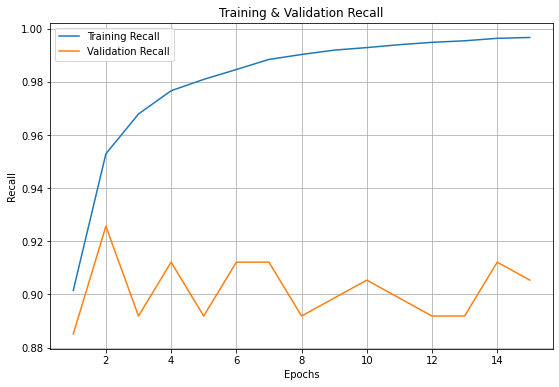

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_ccfd.history['recall']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_ccfd.history['recall'])
plt.plot(epochs, Hist_ccfd.history['val_recall'])
plt.title('Training & Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend(['Training Recall', 'Validation Recall'])
plt.grid()
plt.show()

> ## 6) Model Evaluate

* Loss & Accuracy

In [ ]:
loss, recall = ccfd_OS.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Recall = {:.5f}'.format(recall))

Loss = 0.01575
Recall = 0.90541


> ## 7) Model Predict

* .predict( )

In [ ]:
import numpy as np

y_hat = np.round(ccfd_OS.predict(X_test, verbose = 0))

y_hat

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

* Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  134,    14],
       [  275, 85020]])

* Scores

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99984   0.99678   0.99830     85295
          부정    0.32763   0.90541   0.48115       148

    accuracy                        0.99662     85443
   macro avg    0.66373   0.95109   0.73973     85443
weighted avg    0.99867   0.99662   0.99741     85443



# 
# 
# 
# The End
# 
# 
# 